In [2]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [3]:
fo = pd.ExcelFile('cleaned-range3.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                    text
0      pendeteksi gangguan jaringan lokal metode cert...
1      eksistensi penggunaan wi fi warung kopi kota b...
2      pengaruh internet financial reporting tingkat ...
3      security function analysis performance high sp...
4      implementation top down approach method redesi...
5      optimization wireless network performance hier...
6      analysis qos vlan djikstra s algorithm open sh...
7      link performance improvement sananibun bts wit...
8      legal protection efforts patent holders indonesia
9      use e learning by teachers teaching learning p...
10     definition patent rights examples case studies...
11     analysis implementation backup line network br...
12     classification principles legal basis intellec...
13     attendance system automatic door locks laborat...
14          registration requirements application rights
15     patentability block chain technology future in...
16     influence speed user mob

In [4]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

27515
[['pendeteksi', 'gangguan', 'jaringan', 'lokal', 'metode', 'certainty', 'factor']]


In [5]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                   0               1                2             3   \
0          pendeteksi        gangguan         jaringan         lokal   
1          eksistensi      penggunaan               wi            fi   
2            pengaruh        internet        financial     reporting   
3            security        function         analysis   performance   
4      implementation             top             down      approach   
5        optimization        wireless          network   performance   
6            analysis             qos             vlan      djikstra   
7                link     performance      improvement     sananibun   
8               legal      protection          efforts        patent   
9                 use               e         learning            by   
10         definition          patent           rights      examples   
11           analysis  implementation           backup          line   
12     classification      principles            legal         b

In [7]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(23897 unique tokens: ['certainty', 'factor', 'gangguan', 'jaringan', 'jaringan_lokal']...)


In [8]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

27515


In [9]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [10]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [11]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2454965953
Num Topics = 4  has Coherence Value of 0.3177359595
Num Topics = 6  has Coherence Value of 0.3828337194
Num Topics = 8  has Coherence Value of 0.4189457424
Num Topics = 10  has Coherence Value of 0.4266258449
Num Topics = 12  has Coherence Value of 0.4743320975
Num Topics = 14  has Coherence Value of 0.4630544754
Num Topics = 16  has Coherence Value of 0.4987779732
Num Topics = 18  has Coherence Value of 0.4947762254


In [13]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)
pprint(model.print_topics())

[(0,
  '0.017*"informasi_akademik" + 0.013*"studi_kasus" + 0.013*"smk_negeri" + '
  '0.009*"informasi" + 0.008*"sekolah_menengah" + 0.007*"negeri" + '
  '0.007*"sma_negeri" + 0.007*"sekolah" + 0.007*"jurusan_teknik" + '
  '0.007*"keamanan_jaringan"'),
 (1,
  '0.019*"e_commerce" + 0.014*"pengolahan_data" + 0.007*"support_vector" + '
  '0.007*"commerce" + 0.006*"algoritma_genetika" + 0.006*"segmentasi_citra" + '
  '0.005*"e" + 0.005*"provinsi_jawa" + 0.005*"jaringan_komputer" + '
  '0.004*"data"'),
 (2,
  '0.024*"metode_certainty" + 0.010*"sistem_pakar" + 0.010*"pakar" + '
  '0.009*"penyakit" + 0.008*"pakar_diagnosis" + 0.008*"sepeda_motor" + '
  '0.008*"certainty" + 0.008*"factor" + 0.008*"penyakit_tanaman" + '
  '0.008*"naïve_bayes"'),
 (3,
  '0.019*"media_pembelajaran" + 0.017*"augmented_reality" + '
  '0.013*"pengembangan_media" + 0.013*"siswa_kelas" + 0.011*"php_mysql" + '
  '0.010*"pembelajaran" + 0.008*"media" + 0.007*"terbaik" + 0.007*"reality" + '
  '0.006*"augmented"'),
 (4,
  

In [14]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.029*"pendukung_keputusan" + 0.013*"metode_weighted" + 0.011*"pendukung" + 0.009*"keputusan" + 0.008*"studi_kasus" + 0.008*"sma_negeri" + 0.007*"saw" + 0.007*"program_studi" + 0.007*"algoritma_genetika" + 0.006*"neural_network"
Topic: 1 Word: 0.010*"learning_vector" + 0.007*"support_vector" + 0.007*"jarak_jauh" + 0.006*"location_service" + 0.006*"object_oriented" + 0.006*"visual_basic" + 0.006*"vector" + 0.005*"penginderaan_jauh" + 0.005*"demam_berdarah" + 0.005*"operasi_windows"
Topic: 2 Word: 0.025*"metode_simple" + 0.022*"additive_weighting" + 0.015*"mata_kuliah" + 0.013*"simple" + 0.013*"additive" + 0.012*"weighting" + 0.010*"metode_simple_additive_weighting" + 0.009*"game_edukasi" + 0.006*"metodologi_berorientasi" + 0.006*"game"
Topic: 3 Word: 0.027*"metode_forward" + 0.021*"pakar" + 0.021*"sistem_pakar" + 0.020*"metode_certainty" + 0.017*"penyakit" + 0.017*"pakar_diagnosa" + 0.013*"diagnosa" + 0.012*"diagnosa_penyakit" + 0.011*"pakar_mendiagnosa" + 0.010*"forward"

# Dominant topic and its percentage contribution in each document

In [15]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,3.0,0.4946,"metode_forward, pakar, sistem_pakar, metode_ce...","[pendeteksi, gangguan, jaringan, lokal, metode..."
1,1,12.0,0.4704,"informasi_penjualan, pendukung_keputusan, peng...","[eksistensi, penggunaan, wi, fi, warung, kopi,..."
2,2,14.0,0.4011,"informasi_geografis, media_pembelajaran, augme...","[pengaruh, internet, financial, reporting, tin..."
3,3,5.0,0.4077,"jaringan_komputer, pakar_diagnosis, diagnosis_...","[security, function, analysis, performance, hi..."
4,4,6.0,0.9148,"informasi_akuntansi, metode_waterfall, sms_gat...","[implementation, top, down, approach, method, ..."
5,5,5.0,0.5522,"jaringan_komputer, pakar_diagnosis, diagnosis_...","[optimization, wireless, network, performance,..."
6,6,6.0,0.7299,"informasi_akuntansi, metode_waterfall, sms_gat...","[analysis, qos, vlan, djikstra, s, algorithm, ..."
7,7,15.0,0.3156,"smk_negeri, siswa_kelas, expert_system, hasil_...","[link, performance, improvement, sananibun, bt..."
8,8,0.0,0.6520,"pendukung_keputusan, metode_weighted, pendukun...","[legal, protection, efforts, patent, holders, ..."
9,9,14.0,0.8651,"informasi_geografis, media_pembelajaran, augme...","[use, e, learning, by, teachers, teaching, lea..."


In [16]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [17]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

3.0     3172
14.0    2320
0.0     2226
8.0     1977
11.0    1935
12.0    1856
13.0    1720
15.0    1637
4.0     1429
1.0     1412
6.0     1396
5.0     1378
9.0     1376
10.0    1272
7.0     1221
2.0     1188
Name: Topik_Dominan, dtype: int64

In [18]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

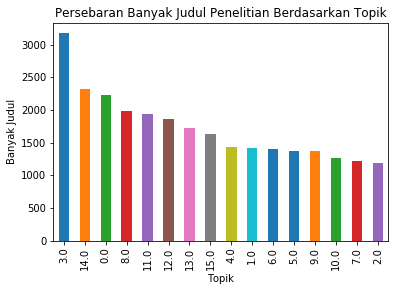

In [19]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [20]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9625,"pendukung_keputusan, metode_weighted, pendukung, keputusan, studi_kasus, sma_negeri, saw, progra...","[rancang, bangun, sistem, informasi, inventarisasi, laporan, tugas, akhir, mahasiswa, program, s..."
1,1.0,0.9698,"learning_vector, support_vector, jarak_jauh, location_service, object_oriented, visual_basic, ve...","[klasifikasi, pola, sidik, bibir, jenis, kelamin, manusia, metode, gray, level, co, occurrence, ..."
2,2.0,0.9507,"metode_simple, additive_weighting, mata_kuliah, simple, additive, weighting, metode_simple_addit...","[sistem, informasi, tunggakan, premi, nasabah, pemrograman, visual, delphi, asuransi, jiwa, bery..."
3,3.0,0.9609,"metode_forward, pakar, sistem_pakar, metode_certainty, penyakit, pakar_diagnosa, diagnosa, diagn...","[deteksi, usia, citra, panoramik, pulpa, gigi, molar, pertama, mandibula, discrete, wavelet, tra..."
4,4.0,0.9574,"rancang_bangun, certainty_factor, operasi_android, administrasi, deteksi_tepi, framework_codeign...","[rancang, bangun, sistem, pengenalan, citra, tingkat, kematangan, buah, pepaya, california, warn..."
5,5.0,0.9592,"jaringan_komputer, pakar_diagnosis, diagnosis_penyakit, informasi_pemesanan, artificial_neural, ...","[rancang, bangun, keamanan, data, jaringan, komputer, metode, ipsec, vpn, studi, kasus, agrabudi..."
6,6.0,0.9639,"informasi_akuntansi, metode_waterfall, sms_gateway, informasi, forward_chaining, studi_kasus, in...","[rancang, bangun, sistem, informasi, kepegawaian, simpeg, sdlc, metode, waterfall, studi, kasus,..."
7,7.0,0.9592,"metode_topsis, mata_pelajaran, topsis, penunjang_keputusan, terbaik, information_system, pelajar...","[metode, technique, others, preference, by, similary, ideal, solution, topsis, pemilihan, lokasi..."
8,8.0,0.9554,"perangkat_lunak, informasi_akademik, pendukung_keputusan, pengolahan_citra, naive_bayes, studi_k...","[desain, sistem, kamus, istilah, komputer, android, studi, kasus, sma, muhammadiyah, kartasura, ..."
9,9.0,0.9609,"e_commerce, rekam_medis, pendukung_keputusan, studi_kasus, commerce, basis_data, informasi, e, p...","[implementasi, konsep, business, customer, teknologi, e, commerce, web, studi, kasus, toko, sepa..."


In [21]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-range3.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.230562 -0.203869       1        1  8.725219
14     0.108760 -0.015505       2        1  7.304197
8      0.045497 -0.096395       3        1  6.782347
11    -0.131353  0.097687       4        1  6.781981
12     0.032892 -0.083806       5        1  6.611269
0      0.083982 -0.092871       6        1  6.591941
15     0.085835 -0.039902       7        1  6.119252
13     0.015322 -0.005599       8        1  6.106954
1     -0.090851  0.128334       9        1  5.864684
10     0.023546  0.009901      10        1  5.803957
4     -0.055806  0.065845      11        1  5.724933
5     -0.004113  0.058214      12        1  5.696629
7      0.022406  0.046787      13        1  5.658555
9      0.049449 -0.002807      14        1  5.526490
6      0.072290  0.040699      15        1  5.415445
2     -0.027291  0.093289      16        1  5.286147, topic_info=   

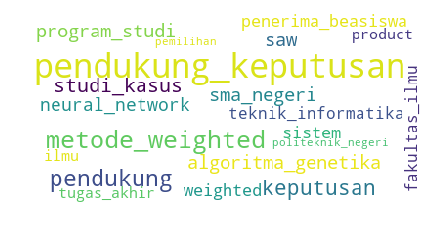

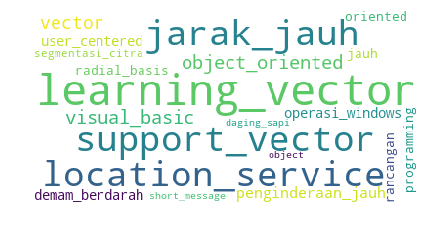

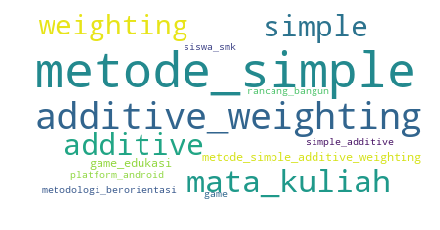

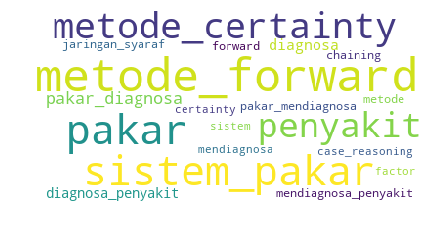

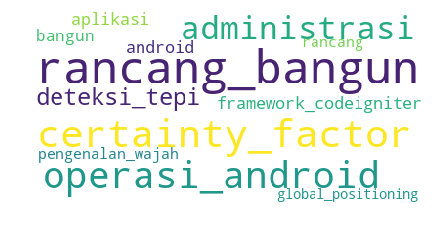

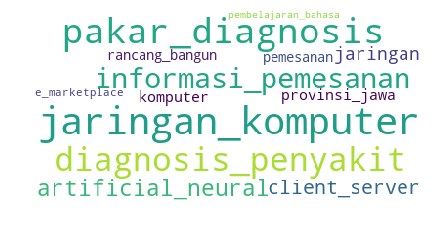

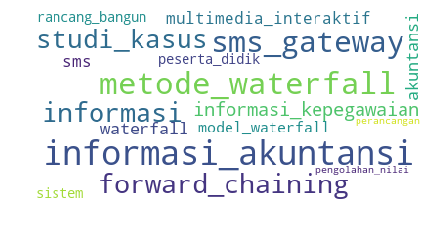

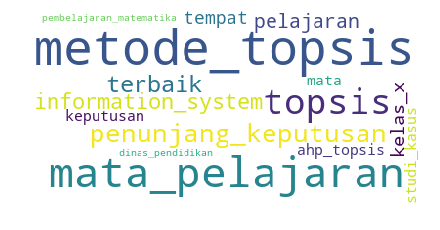

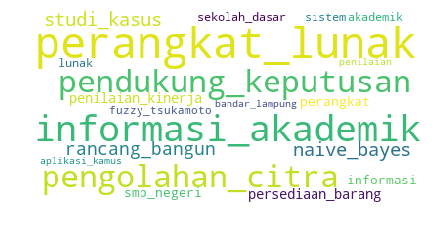

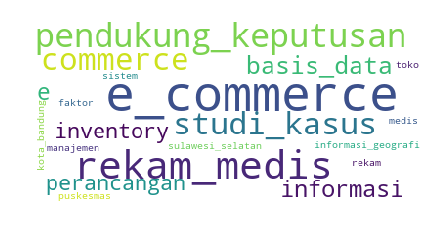

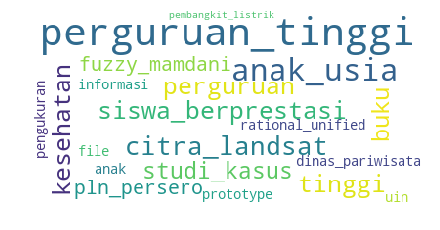

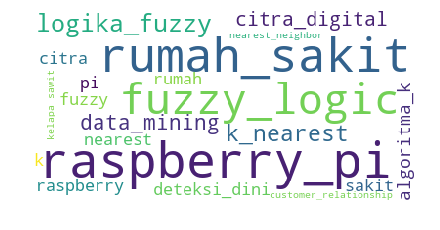

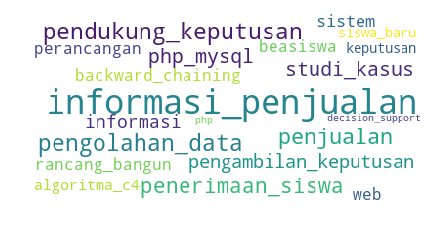

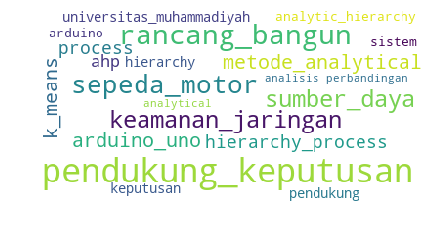

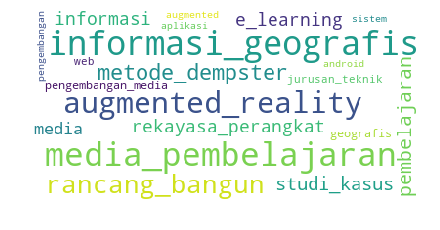

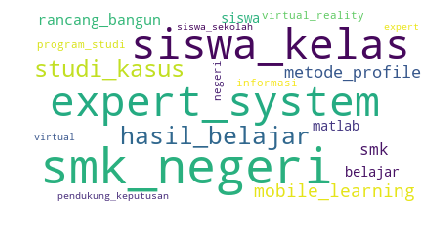

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [23]:
import pickle
filename = 'model-range3.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')